In [16]:
import IPython
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop 
from keras import backend as K

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [17]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 4s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


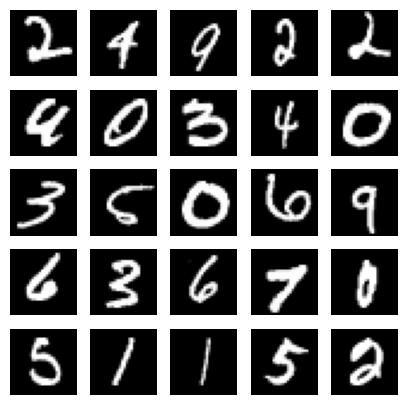

In [18]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [20]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
model.save("MNSITmodel.h5")

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4262 - accuracy: 0.8693
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1960 - accuracy: 0.9421
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1559 - accuracy: 0.9527
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1286 - accuracy: 0.9609
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1183 - accuracy: 0.9642
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1065 - accuracy: 0.9673
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0945 - accuracy: 0.9701
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0829 - accuracy: 0.9747
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0794 - accuracy: 0.9743

In [26]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9819

Test accuracy: 98.2%


In [3]:
model.save("MNISTModel.h5")

NameError: name 'model' is not defined